データサイエンス特別PG データサイエンス特論 第13回 主成分分析

In [ ]:
# google colab で実行する場合は下記のコメントアウトを外して実行する
# ! wget https://raw.githubusercontent.com/KHiraGit/sudspg_ds/main/ic_103_decathlon.csv

# 下記を参考に作成
# https://santakalog.com/2021/02/13/python-pca/

In [1]:
# ライブラリをインポート
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

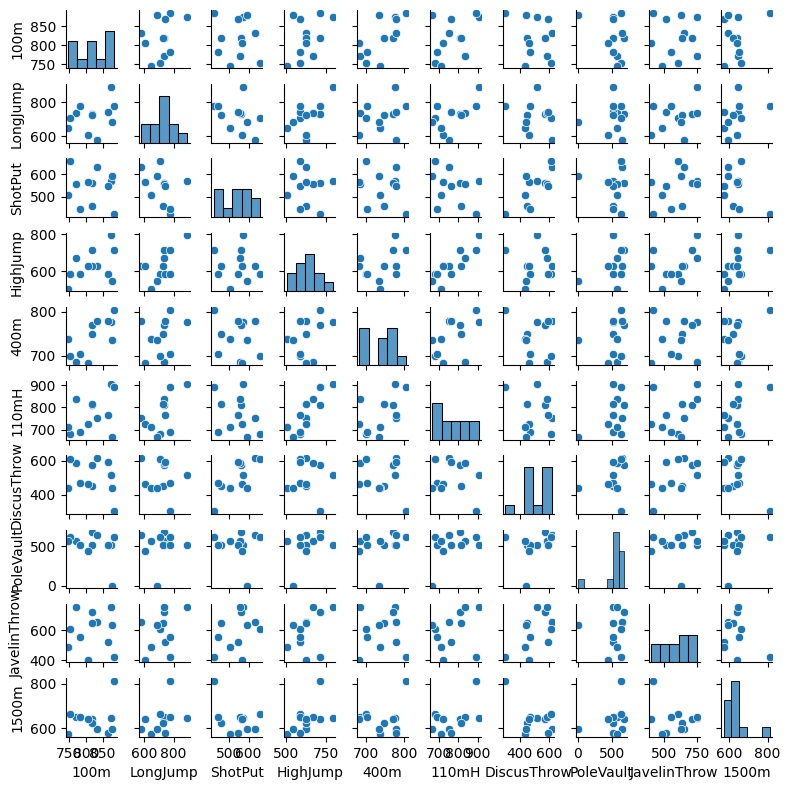

In [2]:
# 十種競技のデータ(csv形式)を読み込んでデータフレームを作成
decathlon_df = pd.read_csv('ic_103_decathlon.csv', encoding='utf-8')
# ペアプロットを表示 (順位の列は除外)
sns.pairplot(decathlon_df.drop(columns='Rank'), height=0.8, aspect=1)

In [3]:
# データを標準化
data = ['100m', 'LongJump', 'ShotPut', 'HighJump', '400m', 
        '110mH', 'DiscusThrow', 'PoleVault', 'JavelinThrow', '1500m']
stdsc = StandardScaler()
decathlon_std_df = stdsc.fit_transform(decathlon_df[data])

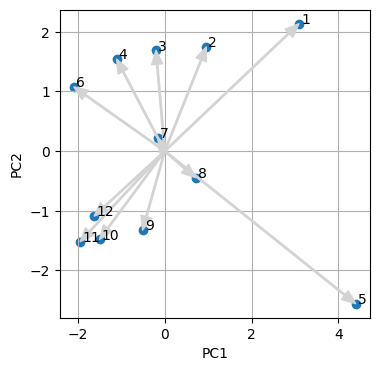

In [4]:
#主成分分析を実行
pca = PCA()
pca.fit(decathlon_std_df)

# データを主成分空間に写像
pca_cor = pca.transform(decathlon_std_df)
pca_df = pd.DataFrame(pca_cor, columns = data)

# 第一主成分と第二主成分で各選手の成績をプロット
plt.figure(figsize=(4, 4))
origin =(0,0)
for x, y, name in zip(pca_cor[:, 0], pca_cor[:, 1], decathlon_df['Rank']):
    plt.annotate(text='', xy=(x,y), xytext=origin, # text='' でエラーとなる場合は s='' に変更する
                 arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, 
                 connectionstyle='arc3', facecolor='lightgray', edgecolor='lightgray'))
    plt.text(x+0.05, y, name)
plt.scatter(pca_cor[:, 0], pca_cor[:, 1])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [5]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=data, 
            index=["PC{}".format(x + 1) for x in range(len(data))])

,100m,LongJump,ShotPut,HighJump,400m,110mH,DiscusThrow,PoleVault,JavelinThrow,1500m
PC1,0.315233,0.363230,-0.263787,0.420340,0.333500,0.461151,-0.218659,0.143574,0.041635,0.358304
PC2,-0.043490,0.123071,0.413696,0.291258,0.031176,0.177084,0.551629,0.213829,0.554085,-0.193981
PC3,-0.597660,-0.030691,-0.200154,0.060697,-0.292614,0.085947,0.050681,0.633560,-0.126344,0.291849
PC4,0.190096,-0.519760,0.159015,-0.068225,0.586073,0.024614,0.147668,0.430566,-0.329123,-0.064583
PC5,0.159911,-0.256970,0.553521,0.317851,-0.311001,-0.052148,-0.021899,-0.158407,-0.189471,0.583153
PC6,0.087094,0.663011,0.183447,-0.214209,0.165285,-0.436189,0.300992,0.145210,-0.317720,0.207568
PC7,-0.190126,-0.117672,0.047444,-0.288440,0.377117,-0.289690,-0.234600,-0.007799,0.600547,0.471874
PC8,-0.415129,0.240984,0.561131,-0.005431,0.209641,0.234428,-0.518468,-0.011517,-0.155874,-0.250107
PC9,-0.028609,-0.021531,-0.092544,0.651269,0.074511,-0.643802,-0.253909,0.143072,0.043273,-0.243225
PC10,0.512784,0.061841,0.167940,-0.275412,-0.378077,-0.040622,-0.379641,0.529185,0.208090,-0.130820


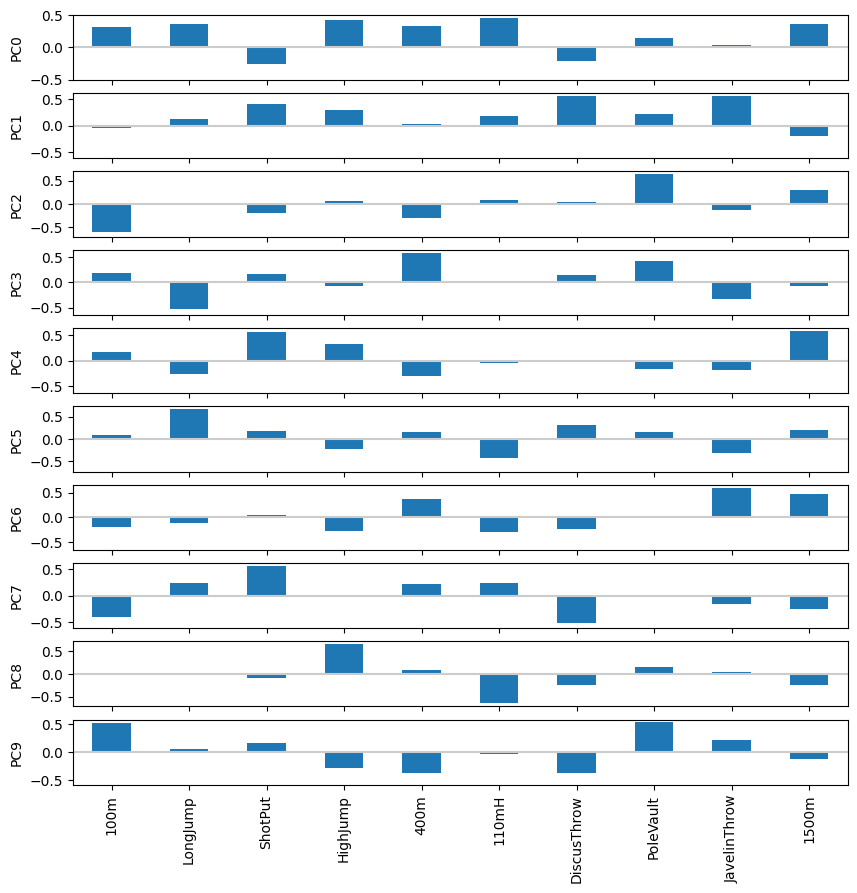

In [6]:
# 固有ベクトルを棒グラフで表示
centers = pd.DataFrame(pca.components_, columns=data)
f, axes = plt.subplots(len(data), 1, sharex=True, figsize=(10,10))
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.1 * np.max(np.max(np.abs(center)))
    center.plot.bar(ax=ax)
    ax.axhline(color='#cccccc')
    ax.set_ylabel(f'PC{i}')
    ax.set_ylim(-maxPC, maxPC)

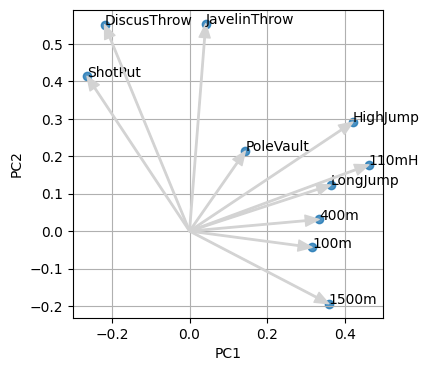

In [7]:
# 第一主成分と第二主成分における観測変数をプロット
plt.figure(figsize=(4, 4))
origin =(0,0)
for x, y, name in zip(pca.components_[0], pca.components_[1], data):
    plt.annotate(text='', xy=(x,y), xytext=origin, # text='' でエラーとなる場合は a='' に変更する
                 arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, 
                 connectionstyle='arc3', facecolor='lightgray', edgecolor='lightgray'))
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [8]:
# 寄与率
_output = ''
for i in range(10):
    _output = _output + f'[PC{i+1} {pca.explained_variance_ratio_[i]:.03f}] '
print(_output)

[PC1 0.375] [PC2 0.235] [PC3 0.151] [PC4 0.100] [PC5 0.066] [PC6 0.033] [PC7 0.022] [PC8 0.012] [PC9 0.006] [PC10 0.000] 


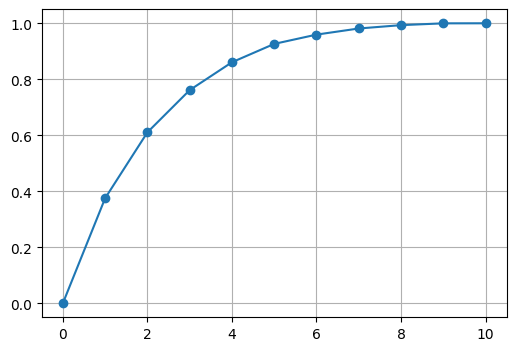

In [9]:
# 累積寄与率
plt.figure(figsize=(6, 4))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.grid()
plt.show()